# Magnetorquer quick math

Magnetic moment from a magnetorquer is given by the formula:

$ \vec{m} = N I A \vec{n} $ 

Where $ N $ is the number of turns, $ I $ is the current, $ A $ is the area of the coil, and $ \vec{n} $ is the normal vector of the coil. For now I will focus on the magnitude of the magnetic moment, so I drop the vector notation and the normal vector. 

So we are left with: 

$ m = N I A $

In our case we are limited by our power supply, we have a 5 V at 2 A and thats it. From this we need to find the best configuration for the magnetorquer.
Lets set some maximum value for current in each coil $ I_{max} $, and find the resistance of the coil that will give us this current.

$ R = \frac{U}{I_{max}}$

Now we find a magnet wire to match this resistance. Thicker wire has lower resistance, so we get more turns with the same resistance and thus more magnetic moment.
So thicker wire is better, however we are limited by: 

1. Size of the coil - we need to fit it on the satellite
2. Weight - we need to keep the satellite light

The resistance of the magnet wire is given by: 

$ R = \rho \frac{L}{A} $

Where $ \rho $ is the resistivity of the wire, $ L $ is the length of the wire and $ A $ is the cross section area of the wire.

We can find the length of the wire: 

$ L = \frac{R A}{\rho} = \frac{U A}{\rho I_{max}} $

To find the number of turns we need to find the circumference of the coil, for a circular coil it is:

$ C = 2 \pi r_{core} $

Where $ r_{core} $ is the radius of the core, for a square coil it is:

$ C = 4 l_{core} $

Where $ l_{core} $ is the length of sides of the core.

For now lets assume the core has infinite length so all the coil is wrapped around it in a single layer.

The number of turns is then:

$ N \approx \frac{L}{C} $

In practice however the core has some finite length, so we will likely end up with multiple layers of the coil. This will effectively reduce the total number of turns, as the radius of the coil will increase with each layer.

Rather than finding a formula for this I made a simple numerical calculation in the python code below.

# Caclulate the magnetic moment for a circular coil.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def magneticMoment_1(N,I,A,mu_eff):
    # N = number of turns
    # I = current
    # A = area
    return N*I*A*mu_eff



A = 0.05*10**-6 #wire cross sectional area in m^2 (0.05mm^2)
mu_eff = 6000 # effective permeability of iron
massOfCore = 7.87*10**3 # kg/m^3 mass of iron
massOfwire = 8.96*10**3 # kg/m^3 mass of copper
p = 1.68*10**-8 #Ohm*m (copper resistivity)

U = 3.3 # Voltage
Imax = 0.39/U # Max current (for 0.39 watts of power)

coilCoreDiameter = 0.01 # diameter of the core in meters (10mm)
coilCoreLength = 0.070 # length of the core in meters (80mm)

r = np.sqrt(A/np.pi) # wire radius
R = U/Imax # Resistance to match the max current
print ("Resistance: ", R)

Cr = coilCoreDiameter/2 # Core radius
coreArea = np.pi*(Cr**2) # Core area

Length = (R*A)/(p) # Length of the wire
print("Wire length: ", Length)

coreVolume = np.pi*(Cr**2)*coilCoreLength # Core volume
wireVolume = A*Length # Wire volume

wireMass = wireVolume*massOfwire # Wire mass
coreMass = coreVolume*massOfCore # Core mass
totalMass = wireMass + coreMass # Total mass
print("Total mass: ", totalMass*1000, "g")

Napprox = Length/(2*np.pi*(Cr+r)) # Number of turns assuming perfect packing and single layer of wire.
print("Number of turns assuming perfect packing and single layer of wire: ", Napprox)

m1 = magneticMoment_1(Napprox,Imax,coreArea,mu_eff)
print("Magnetic moment assuming perfect packing and single layer of wire: ", m1)


NumberOfTurnsPerLayer = int(coilCoreLength/(2*r)) # Number of turns per layer assuming perfect packing
# round down 
print("Number of turns per layer: ", NumberOfTurnsPerLayer)


# Numberical calculation of the number of layers and number of turns

layers = 0 # Number of layers
N = 0 # Number of turns
while True:
    layers += 1 
    radiusAroundCore = coilCoreDiameter/2 + r*(2*layers-1) # Radius at the center of the wire
    if (Length - NumberOfTurnsPerLayer*2*np.pi*radiusAroundCore) < 0:
        N += Length/(2*np.pi*radiusAroundCore)
        break
    else:
        N += NumberOfTurnsPerLayer
        Length -= NumberOfTurnsPerLayer*2*np.pi*radiusAroundCore

finalCoilDiameter = coilCoreDiameter + 2*2*r*layers
print("Numerical calculation:")
print("Number of layers: ", layers)
print("Final coil diameter: ", finalCoilDiameter)
print("Number of turns: ", N)
print("Magnetic moment: ", magneticMoment_1(N,Imax,coreArea,mu_eff))

Resistance:  27.92307692307692
Wire length:  83.10439560439559
Total mass:  80.49835405233466 g
Number of turns assuming perfect packing and single layer of wire:  2580.1933725080285
Magnetic moment assuming perfect packing and single layer of wire:  143.69579327844525
Number of turns per layer:  277
Numerical calculation:
Number of layers:  8
Final coil diameter:  0.014037012035232256
Number of turns:  2202.9377901060034
Magnetic moment:  122.68572451399174


# Calculate the magnetic moment for a square coil.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def magneticMoment_1(N,I,A,mu_eff):
    # N = number of turns
    # I = current
    # A = area
    return N*I*A*mu_eff



A = 0.05*10**-6 #wire cross sectional area in m^2 (0.05mm^2)
mu_eff = 1 # effective permeability of air
massOfCore = 0 # kg/m^3 air core
massOfwire = 8.96*10**3 # kg/m^3 mass of copper
p = 1.68*10**-8 #Ohm*m (copper resistivity)

U = 3.3 # Voltage
Imax = 0.39/U # Max current (for 0.39 watts of power)

coilCoreSideLength = 0.080 # diameter of the core in meters (80mm)
coilCoreLength = 0.02 # length of the core in meters (20mm)

r = np.sqrt(A/np.pi) # wire radius
R = U/Imax # Resistance to match the max current
print ("Resistance: ", R)

coilCircumference = 4*coilCoreSideLength
coreArea = coilCoreSideLength**2 # Core area

Length = (R*A)/(p) # Length of the wire
print("Wire length: ", Length)

coreVolume = coreArea*coilCoreLength # Core volume
wireVolume = A*Length # Wire volume

wireMass = wireVolume*massOfwire # Wire mass
coreMass = coreVolume*massOfCore # Core mass
totalMass = wireMass + coreMass # Total mass
print("Total mass: ", totalMass*1000, "g")

Napprox = Length/coilCircumference # Number of turns assuming perfect packing and single layer of wire.
print("Number of turns assuming perfect packing and single layer of wire: ", Napprox)

m1 = magneticMoment_1(Napprox,Imax,coreArea,mu_eff)
print("Magnetic moment assuming perfect packing and single layer of wire: ", m1)


NumberOfTurnsPerLayer = int(coilCoreLength/(2*r)) # Number of turns per layer assuming perfect packing
# round down 
print("Number of turns per layer: ", NumberOfTurnsPerLayer)


# Numberical calculation of the number of layers and number of turns

layers = 0 # Number of layers
N = 0 # Number of turns
while True:
    layers += 1 
    topLayerCoilCircumference = (coilCoreSideLength + 2*r*(2*layers-1))*4
    if (Length - NumberOfTurnsPerLayer*topLayerCoilCircumference) < 0:
        N += Length/(topLayerCoilCircumference)
        break
    else:
        N += NumberOfTurnsPerLayer
        Length -= NumberOfTurnsPerLayer*topLayerCoilCircumference

finalCoilDiameter = coilCoreDiameter + 2*2*r*layers
print("Numerical calculation:")
print("Number of layers: ", layers)
print("Final coil diameter: ", finalCoilDiameter)
print("Number of turns: ", N)
print("Magnetic moment: ", magneticMoment_1(N,Imax,coreArea,mu_eff))


Resistance:  27.92307692307692
Wire length:  83.10439560439559
Total mass:  37.230769230769226 g
Number of turns assuming perfect packing and single layer of wire:  259.70123626373623
Magnetic moment assuming perfect packing and single layer of wire:  0.19642857142857142
Number of turns per layer:  79
Numerical calculation:
Number of layers:  4
Final coil diameter:  0.012018506017616129
Number of turns:  257.01688134702493
Magnetic moment:  0.19439822298247708


# A poor attempt at iterating over different core sizes and wire thicknesses to find the best configuration.

(np.float64(0.00015882850757551254), np.float64(0.015577915257333371), np.float64(2443.5155011617308), 13, np.float64(77.38095238095241), np.float64(1.3000000000000003e-07))
Wire cross sectional area:  1.3000000000000003e-07
Magnetic moment:  0.00015882850757551254
Number of turns:  2443.5155011617308
Number of layers:  13
Final coil diameter:  0.015577915257333371
Wire length:  77.38095238095241


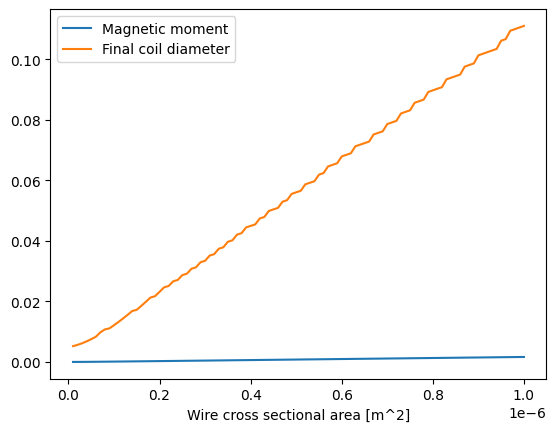

In [11]:
Amin = 0.01*10**-6 # 0.01mm^2
Amax = 1*10**-6 # 0.1mm^2
Steps = np.linspace(Amin,Amax,100)

U = 5 # Voltage
Imax = 0.5 # Max current
coilCoreDiameter = 0.005 # 10mm
coilCoreLength = 0.080 # 80mm

def calculateMagneticMoment(A,U,Imax,coilCoreDiameter,coilCoreLength):


    r = np.sqrt(A/np.pi) # wire radius

    R = U/Imax # Resistance to match the max current

    p = 1.68*10**-8 #Ohm*m (copper resistivity)

    Length = (R*A)/(p) # Length of the wire
    L = Length # Save the length of the wire for return


    NumberOfTurnsPerLayer = int(coilCoreLength/(2*r)) # Number of turns per layer assuming perfect packing

    layers = 0 # Number of layers
    N = 0 # Number of turns
    while True:
        layers += 1 
        radiusAroundCore = coilCoreDiameter/2 + r*(2*layers-1) # Radius at the center of the wire
        if (Length - NumberOfTurnsPerLayer*2*np.pi*radiusAroundCore) < 0:
            N += Length/(2*np.pi*radiusAroundCore)
            break
        else:
            N += NumberOfTurnsPerLayer
            Length -= NumberOfTurnsPerLayer*2*np.pi*radiusAroundCore

    finalCoilDiameter = coilCoreDiameter + 2*2*r*layers

    m = magneticMoment_1(N,Imax,A,mu_eff)

    return m, finalCoilDiameter, N, layers, L, A

results = []

for A in Steps:
    results.append(calculateMagneticMoment(A,U,Imax,coilCoreDiameter,coilCoreLength))

# find a result where x[1] approx 0.06 
for x in results:
    if x[1] > 0.015:
        print(x)
        print("Wire cross sectional area: ", x[5])
        print("Magnetic moment: ", x[0])
        print("Number of turns: ", x[2])
        print("Number of layers: ", x[3])
        print("Final coil diameter: ", x[1])
        print("Wire length: ", x[4])

        break


plt.figure()
# Magnetic moment vs wire cross sectional area 
plt.plot([x[5]for x in results],[x[0] for x in results],label="Magnetic moment")
#plt.plot([x[5]for x in results],[x[2] for x in results],label="Number of turns")
#plt.plot([x[5]for x in results],[x[3] for x in results],label="Number of layers")
plt.plot([x[5]for x in results],[x[1] for x in results],label="Final coil diameter")
#plt.plot([x[5]for x in results],[x[4] for x in results],label="Wire length")
plt.xlabel("Wire cross sectional area [m^2]")

plt.legend()
plt.show()